In [1]:
%autosave 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

heart_disease = pd.read_csv("resources/heart-disease.csv")

# Prepare data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import the model
from sklearn.ensemble import RandomForestClassifier

# Instatiate the model
clf = RandomForestClassifier();

# Fit the model
clf.fit(X_train, y_train)

from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs_positive = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

Autosaving every 1 seconds


# 4. Evaluating a model

## 4.1 Evaluating a model with the `score()` method

### 4.2.2 Area under the receiver operating characteristic curve (AUC/ROC)

#### Plotting ROC curves

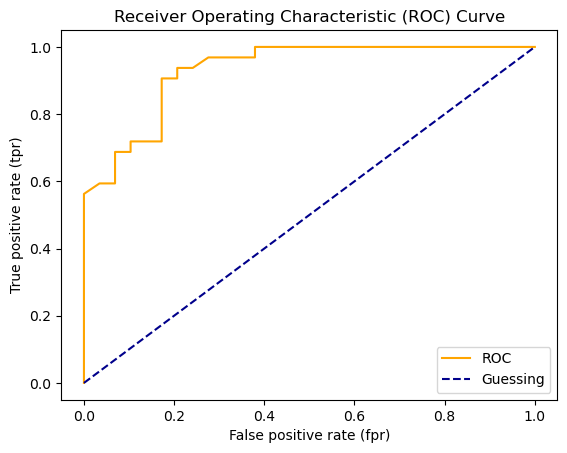

In [5]:
import matplotlib.pyplot as plt

def plot_roc_curve (fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate
    (tpr) of a model.
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [7]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive) ## AUC = Area Under Curve

0.9310344827586207

#### Plot perfect ROC curve and AUC score

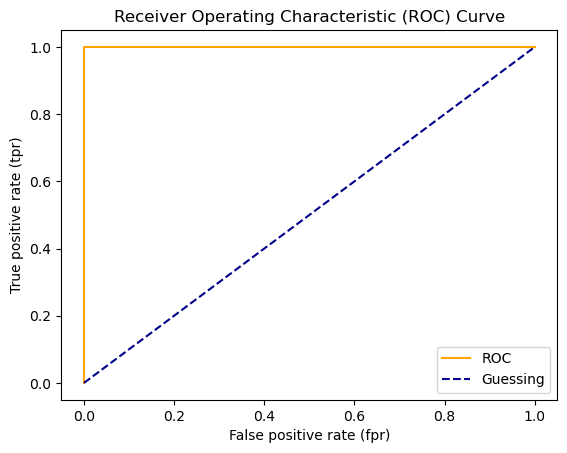

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)